In [5]:
import cx_Oracle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rc('font', family = 'Malgun Gothic') # 한글 입력
plt.rcParams['axes.unicode_minus'] = False # 글꼴 변경시 마이너스 표기 가능으로 처리

In [2]:
# 계절성 보정 사용자 함수

def seasonal_scaled(df):
    df1 = df.copy()
    df1.loc[(df1['연도'] == 2014) & (df1['분기'] == '1분기'), '총구매액'] = np.round(df1.loc[(df1['연도'] == 2014) & (df1['분기'] == '1분기'), '총구매액'] / 0.9476399112)
    df1.loc[(df1['연도'] == 2014) & (df1['분기'] == '2분기'), '총구매액'] = np.round(df1.loc[(df1['연도'] == 2014) & (df1['분기'] == '2분기'), '총구매액'] / 0.9785290501)    
    df1.loc[(df1['연도'] == 2014) & (df1['분기'] == '3분기'), '총구매액'] = np.round(df1.loc[(df1['연도'] == 2014) & (df1['분기'] == '3분기'), '총구매액'] / 0.9072731695)    
    df1.loc[(df1['연도'] == 2014) & (df1['분기'] == '4분기'), '총구매액'] = np.round(df1.loc[(df1['연도'] == 2014) & (df1['분기'] == '4분기'), '총구매액'] / 1.166557869)    
    df1.loc[(df1['연도'] == 2015) & (df1['분기'] == '1분기'), '총구매액'] = np.round(df1.loc[(df1['연도'] == 2015) & (df1['분기'] == '1분기'), '총구매액'] / 0.9748289537)    
    df1.loc[(df1['연도'] == 2015) & (df1['분기'] == '2분기'), '총구매액'] = np.round(df1.loc[(df1['연도'] == 2015) & (df1['분기'] == '2분기'), '총구매액'] / 0.9784250528)    
    df1.loc[(df1['연도'] == 2015) & (df1['분기'] == '3분기'), '총구매액'] = np.round(df1.loc[(df1['연도'] == 2015) & (df1['분기'] == '3분기'), '총구매액'] / 0.912781587)    
    df1.loc[(df1['연도'] == 2015) & (df1['분기'] == '4분기'), '총구매액'] = np.round(df1.loc[(df1['연도'] == 2015) & (df1['분기'] == '4분기'), '총구매액'] / 1.133964406)
    df1['총구매액'] = df1['총구매액'].astype('int64')
    return df1

In [ ]:
def new_seasonal_scaled(df):
    df1 = df.copy()
    df1.loc[df1['기'] == '1기', '총구매액'] = np.round(df1.loc[df1['기'] == '1기', '총구매액'] / 0.9476399112)
    df1.loc[df1['기'] == '2기', '총구매액'] = np.round(df1.loc[df1['기'] == '2기', '총구매액'] / 0.9785290501)    
    df1.loc[df1['기'] == '3기', '총구매액'] = np.round(df1.loc[df1['기'] == '3기', '총구매액'] / 0.9072731695)    
    df1.loc[df1['기'] == '4기', '총구매액'] = np.round(df1.loc[df1['기'] == '4기', '총구매액'] / 1.166557869)    
    df1.loc[df1['기'] == '5기', '총구매액'] = np.round(df1.loc[df1['기'] == '5기', '총구매액'] / 0.9748289537)    
    df1.loc[df1['기'] == '6기', '총구매액'] = np.round(df1.loc[df1['기'] == '6기', '총구매액'] / 0.9784250528)    
    df1.loc[df1['기'] == '7기', '총구매액'] = np.round(df1.loc[df1['기'] == '7기', '총구매액'] / 0.912781587)    
    df1.loc[df1['기'] == '8기', '총구매액'] = np.round(df1.loc[df1['기'] == '8기', '총구매액'] / 1.133964406)
    df1['구매금액'] = df1['총구매액'].astype('int64')
    return df1

In [5]:
# 고정고객으로 정의한 고객 정보 불러오기
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql = '''SELECT a.고객번호, 성별, 연도, 분기, 세분류명, 분류, 고객구분, sum(구매금액) "총구매액"
FROM LCL a
JOIN 고정고객 b ON a.고객번호 = b.고객번호
GROUP BY a.고객번호, 성별, 연도, 분기, 세분류명, 분류, 고객구분
ORDER BY a.고객번호, 연도, 분기, 세분류명, 분류'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호', '성별', '연도', '분기', '세분류명', '분류', '고객구분', '총구매액']
df_all = pd.DataFrame(x, columns = columns)
cursor.close()
con.commit()
con.close()
df_all = seasonal_scaled(df_all).copy()
display(df_all.head())

,고객번호,성별,연도,분기,세분류명,분류,고객구분,총구매액
0,00001,M,2014,1분기,선매품,가구/인테리어,감소,187466
1,00001,M,2014,1분기,선매품,유아동,감소,109472
2,00001,M,2014,1분기,선매품,의류,감소,5278081
3,00001,M,2014,1분기,선매품,패션잡화,감소,450635
4,00001,M,2014,1분기,편의품,가공식품,감소,1275411


In [6]:
# 매출 감소인 고객만 가져오기
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql = '''SELECT a.고객번호, 성별, 연도, 분기, 세분류명, 분류, 고객구분, sum(구매금액) "총구매액"
FROM LCL a
JOIN 고정고객 b ON a.고객번호 = b.고객번호
WHERE 고객구분 = '감소'
GROUP BY a.고객번호, 성별, 연도, 분기, 세분류명, 분류, 고객구분
ORDER BY a.고객번호, 연도, 분기, 세분류명, 분류'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호', '성별', '연도', '분기', '세분류명', '분류', '고객구분', '총구매액']
df_down = pd.DataFrame(x, columns = columns)
cursor.close()
con.commit()
con.close()
df_down = seasonal_scaled(df_down).copy()
display(df_down.head())

,고객번호,성별,연도,분기,세분류명,분류,고객구분,총구매액
0,00001,M,2014,1분기,선매품,가구/인테리어,감소,187466
1,00001,M,2014,1분기,선매품,유아동,감소,109472
2,00001,M,2014,1분기,선매품,의류,감소,5278081
3,00001,M,2014,1분기,선매품,패션잡화,감소,450635
4,00001,M,2014,1분기,편의품,가공식품,감소,1275411


In [7]:
# 매출 증가인 고객만 가져오기
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql = '''SELECT a.고객번호, 성별, 연도, 분기, 세분류명, 분류, 고객구분, sum(구매금액) "총구매액"
FROM LCL a
JOIN 고정고객 b ON a.고객번호 = b.고객번호
WHERE 고객구분 = '증가'
GROUP BY a.고객번호, 성별, 연도, 분기, 세분류명, 분류, 고객구분
ORDER BY a.고객번호, 연도, 분기, 세분류명, 분류'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호', '성별', '연도', '분기', '세분류명', '분류', '고객구분', '총구매액']
df_up = pd.DataFrame(x, columns = columns)
cursor.close()
con.commit()
con.close()
df_up = seasonal_scaled(df_up).copy()
display(df_up.head())

,고객번호,성별,연도,분기,세분류명,분류,고객구분,총구매액
0,00002,M,2014,1분기,선매품,가구/인테리어,증가,501140
1,00002,M,2014,1분기,선매품,디지털/가전,증가,311300
2,00002,M,2014,1분기,선매품,유아동,증가,120214
3,00002,M,2014,1분기,선매품,의류,증가,3900511
4,00002,M,2014,1분기,선매품,패션잡화,증가,350682


In [11]:
# 고정고객으로 정의한 고객 정보 불러오기
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql = '''SELECT a.고객번호, a.성별, a.연령대, a.지역, a.세분류명, a.분류, b.고객구분, a.기, sum(a.구매금액) "총구매액"
FROM LCL2 a
JOIN 고정고객 b ON a.고객번호 = b.고객번호
GROUP BY a.고객번호, a.성별, a.연령대, a.지역, a.세분류명, a.분류, b.고객구분, a.기
ORDER BY a.고객번호, a.성별, a.연령대, a.지역, a.세분류명, a.분류, b.고객구분, a.기'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호', '성별', '연령대', '지역', '세분류명', '분류', '고객구분','기', '총구매액']
df_all = pd.DataFrame(x, columns = columns)
cursor.close()
con.commit()
con.close()
df_all = new_seasonal_scaled(df_all).copy()
display(df_all.head())

KeyboardInterrupt: 

In [ ]:
SELECT a.고객번호, a.성별, a.연령대, a.지역, a.세분류명, a.분류, b.고객구분, a.기, sum(a.구매금액) "총구매액"
FROM LCL2 a
JOIN 증감고객 b ON a.고객번호 = b.고객번호
WHERE 고객구분 = '감소'
GROUP BY a.고객번호, a.성별, a.연령대, a.지역, a.세분류명, a.분류, b.고객구분, a.기
ORDER BY a.고객번호, a.성별, a.연령대, a.지역, a.세분류명, a.분류, b.고객구분, a.기;


In [7]:
# 고정고객으로 정의한 고객들의 총 구매액의 합
df_all['총구매액'].sum()

668425127931

In [8]:
# 고정고객으로 정의한 고객들의 연도별 총 구매액의 합
df_all[['연도','총구매액']].groupby(['연도']).sum()

,총구매액
연도,
2014,326890579100
2015,341534548831


In [9]:
df_all[['연도','분기','총구매액']].groupby(['연도','분기']).sum()

총구매액
연도   분기              
2014 1분기  81722645452
     2분기  81722644342
     3분기  81722644467
     4분기  81722644839
2015 1분기  85383636840
     2분기  85383636788
     3분기  85383638142
     4분기  85383637061

In [16]:
# 고정고객 1분기 8분기 총매출액 증감율
round((85383637061 - 81722645452)/81722645452,3)

0.045

In [3]:
round((15709186603 + 85383637061 - 81722645452)/81722645452,3)

0.237

<AxesSubplot:>

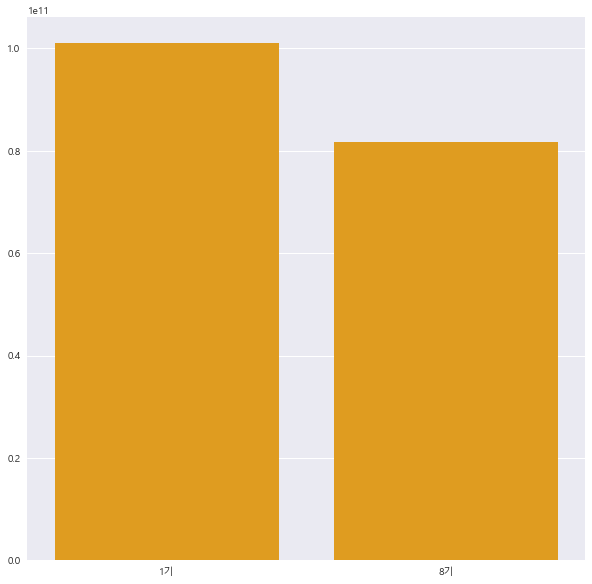

In [17]:
import seaborn as sns
plt.figure(figsize=(10,10))
palette = sns.color_palette("bright")
sns.set_palette("colorblind")
sns.barplot(x=['1기','8기'], y=[15709186603 + 85383637061,81722645452],color = 'orange')

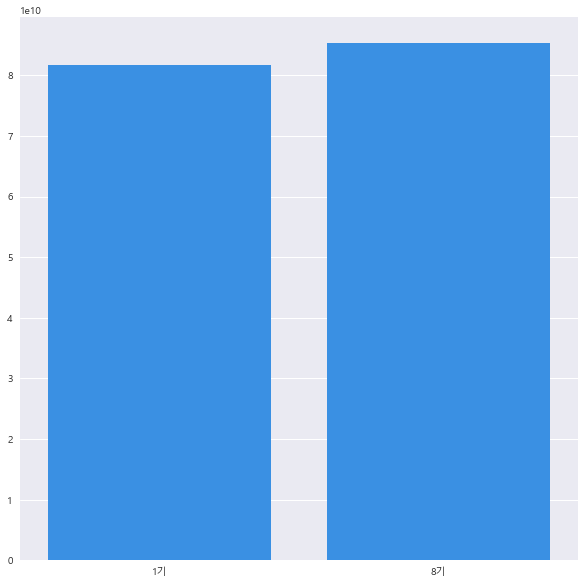

In [13]:
import seaborn as sns
plt.figure(figsize=(10,10))
palette = sns.color_palette("bright")
sns.set_palette("colorblind")
sns.barplot(x=['1기','8기'], y=[81722645452,85383637061],color = 'dodgerblue');

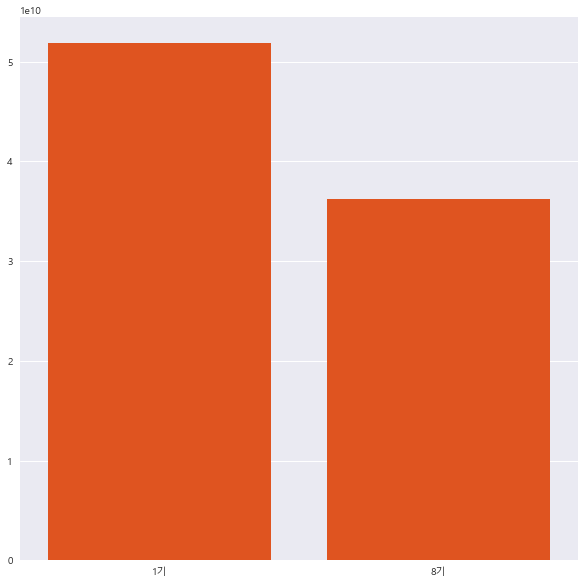

In [14]:
import seaborn as sns
plt.figure(figsize=(10,10))
palette = sns.color_palette("bright")
sns.set_palette("colorblind")
sns.barplot(x=['1기','8기'], y=[51897068780,36187882177], color = 'orangered');

In [ ]:
(51897068780 - 36187882177)

In [12]:
23898480896 + 85383638142

109282119038

In [12]:
df_up[['연도','분기','총구매액']].groupby(['연도','분기']).sum()

총구매액
연도   분기              
2014 1분기  29825576672
     2분기  38393223634
     3분기  41607645543
     4분기  42802452981
2015 1분기  45979897499
     2분기  48293331947
     3분기  57385050258
     4분기  49195754884

In [13]:
(57385050258-29825576672)/29825576672*100

92.40214829399292

In [14]:
df_down[['연도','분기','총구매액']].groupby(['연도','분기']).sum()

총구매액
연도   분기              
2014 1분기  51897068780
     2분기  43329420708
     3분기  40114998924
     4분기  38920191858
2015 1분기  39403739341
     2분기  37090304841
     3분기  27998587884
     4분기  36187882177

In [2]:
# 감소로 정의된 고객 1분기 8분기 총매출액 차이
(51897068780 - 36187882177)

15709186603

In [1]:
(36187882177-51897068780)/51897068780*100

-30.26989186921859

In [17]:
# 고정고객으로 정의한 고객들의 2014년도 대비 2015년도 증가한 매출액
341507338440-326079580279

15427758161

In [18]:
# 고정고객으로 정의한 고객들의 2014년도 대비 2015년도 매출 증가율
abs(100-(341507338440/326079580279)*100)

4.731286193327321

In [19]:
(15427758161/667586918719)*100

2.310973706705274

In [20]:
# 감소고객으로 정의한 고객들의 연도별 총 구매액의 합
df_down[['연도','총구매액']].groupby(['연도']).sum()

,총구매액
연도,
2014,174261680270
2015,140680514243


In [21]:
# 감소고객의 매출 중에서 14년도에서 15년도 매출 감소율
(140625530648-173833007801)/173833007801*100

-19.103090703587867

In [22]:
# 감소고객의 매출 중에서 14년도에서 15년도 매출
173833007801-140625530648

33207477153

In [23]:
# 고정고객 총 매출 중에 감소고객의 매출감소한 비율
(33207477153/667586918719)*100

4.974255220087327

In [24]:
# 고정고객
df_all_1 = pd.pivot_table(df_all,
                     index = '연도', # 행 위치에 들어갈 열
                     columns = ['분기','세분류명'], # 열 위치에들어갈 열
                     values = '총구매액', # 데이터로 사용 할 열
                     aggfunc = 'sum') # 데이터 집계 함수
df_all_1

분기            1분기                                   2분기              \
세분류명          선매품         전문품          편의품          선매품         전문품   
연도                                                                    
2014  42934693552  7014171399  31773780501  44345968514  7144509300   
2015  43062126983  8449488109  33872021748  45041218944  9014991726   

분기                         3분기                                   4분기  \
세분류명          편의품          선매품         전문품          편의품          선매품   
연도                                                                     
2014  30232166528  40021415079  6565896238  35135333150  47698473010   
2015  31327426118  40182496566  8430342484  36770799092  48964414151   

분기                             
세분류명         전문품          편의품  
연도                             
2014  7807768855  26216402974  
2015  9707446570  26711776340

In [25]:
df_down_1 = pd.pivot_table(df_down,
                     index = '연도', # 행 위치에 들어갈 열
                     columns = ['분기','세분류명'], # 열 위치에들어갈 열
                     values = '총구매액', # 데이터로 사용 할 열
                     aggfunc = 'sum') # 데이터 집계 함수
df_down_1

분기            1분기                                   2분기              \
세분류명          선매품         전문품          편의품          선매품         전문품   
연도                                                                    
2014  29059644994  5301514407  17535909379  24661208354  3788008524   
2015  20912000412  4072410916  14419328013  20773533845  3725965200   

분기                         3분기                                   4분기  \
세분류명          편의품          선매품         전문품          편의품          선매품   
연도                                                                     
2014  14880203830  20442681053  3125990365  16546327506  23637065204   
2015  12590805796  13260512835  1917371497  12820703552  21640164085   

분기                             
세분류명         전문품          편의품  
연도                             
2014  3624101055  11659025599  
2015  4238959778  10308758314

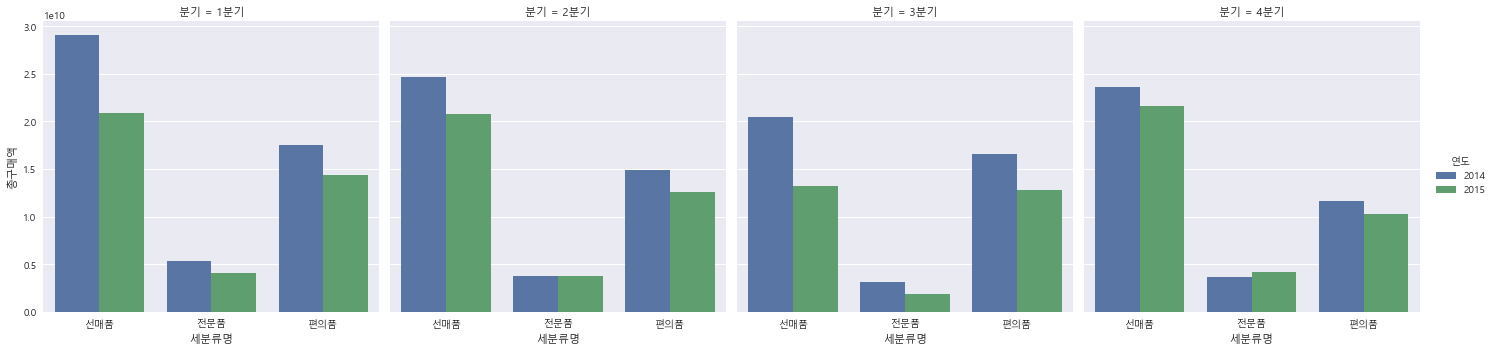

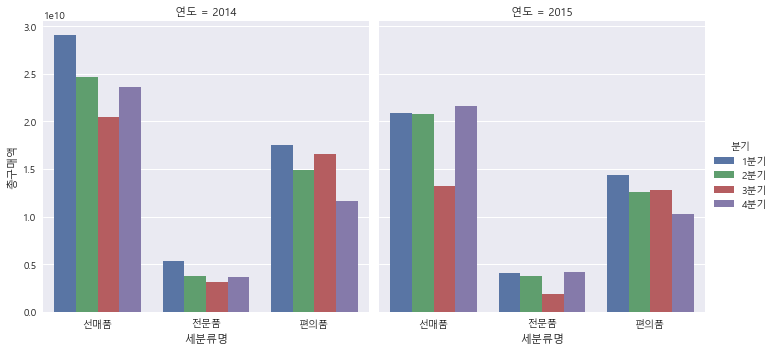

In [27]:
df_down_visualize_1 = df_down.groupby(['연도', '분기', '세분류명'])[['총구매액']].sum()
df_down_visualize_1 = df_down_visualize_1.reset_index()
sns.catplot(data = df_down_visualize_1, x = '세분류명', y = '총구매액', hue = '연도', col = '분기', kind = 'bar')
plt.show()

sns.catplot(data = df_down_visualize_1, x = '세분류명', y = '총구매액', hue = '분기', col = '연도', kind = 'bar')
plt.show()

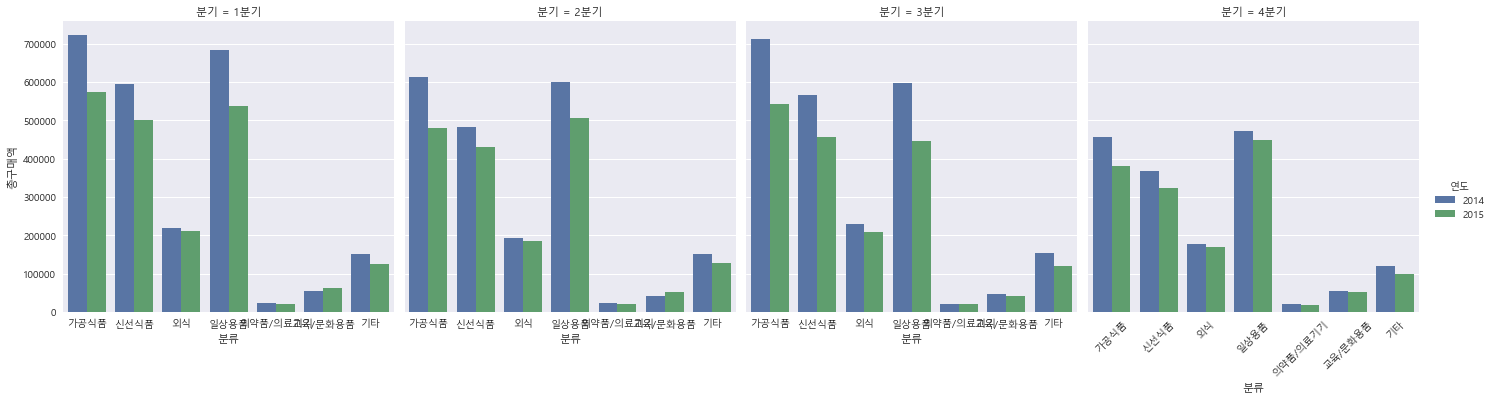

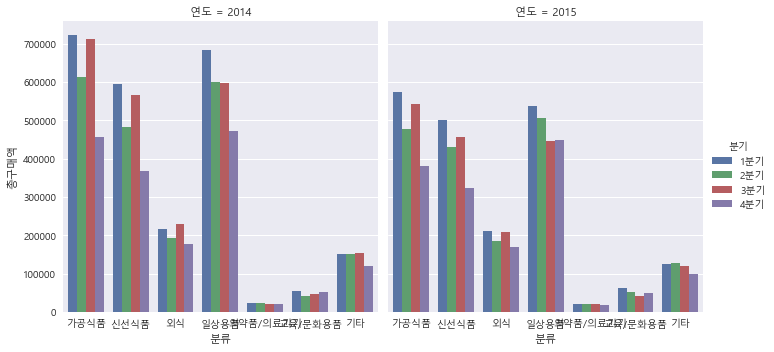

In [29]:
df_down_visualize_2 = df_down.loc[df_down['세분류명'] == '편의품']
df_down_visualize_2.groupby(['연도', '분기', '분류']).sum().reset_index()

sns.catplot(data = df_down_visualize_2, x = '분류', y = '총구매액', hue = '연도', col = '분기', kind = 'bar', ci = False)
plt.xticks(rotation=45)
plt.show()

sns.catplot(data = df_down_visualize_2, x = '분류', y = '총구매액', hue = '분기', col = '연도', kind = 'bar', ci = False)
plt.show()

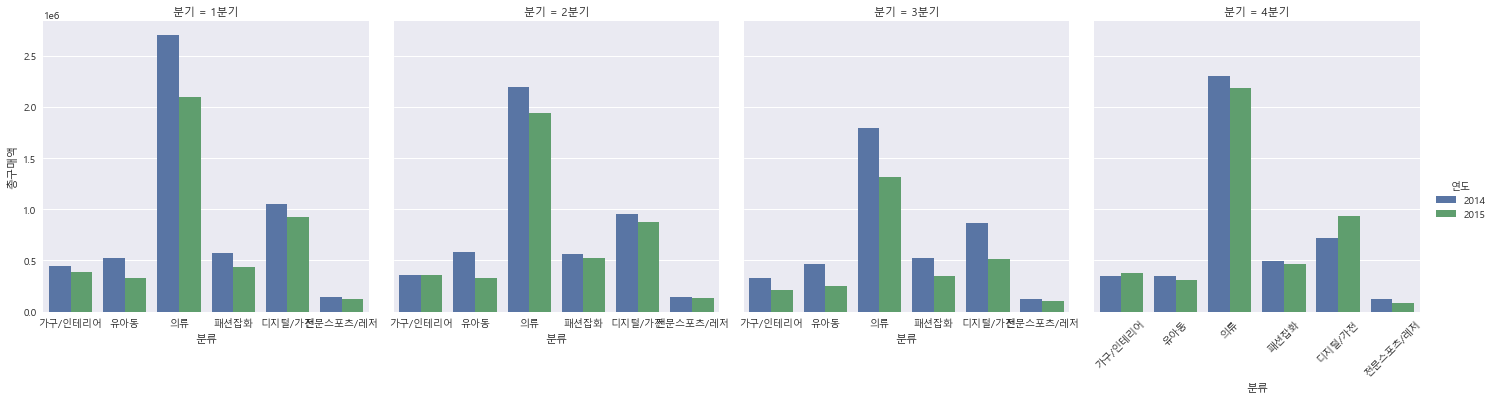

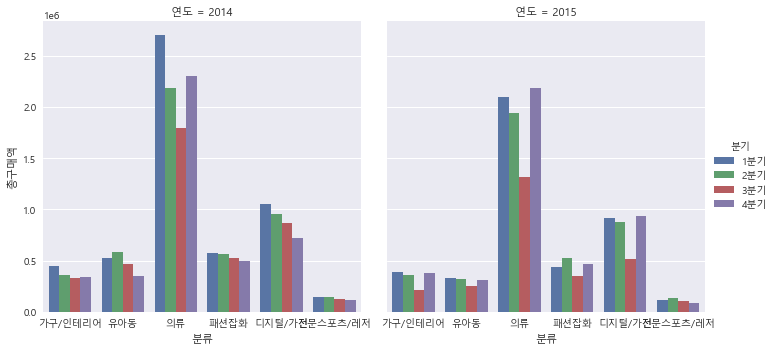

In [28]:
df_down_visualize_2 = df_down.loc[df_down['세분류명'] == '선매품']
df_down_visualize_2.groupby(['연도', '분기', '분류']).sum().reset_index()

sns.catplot(data = df_down_visualize_2, x = '분류', y = '총구매액', hue = '연도', col = '분기', kind = 'bar', ci = False)
plt.xticks(rotation=45)
plt.show()

sns.catplot(data = df_down_visualize_2, x = '분류', y = '총구매액', hue = '분기', col = '연도', kind = 'bar', ci = False)
plt.show()

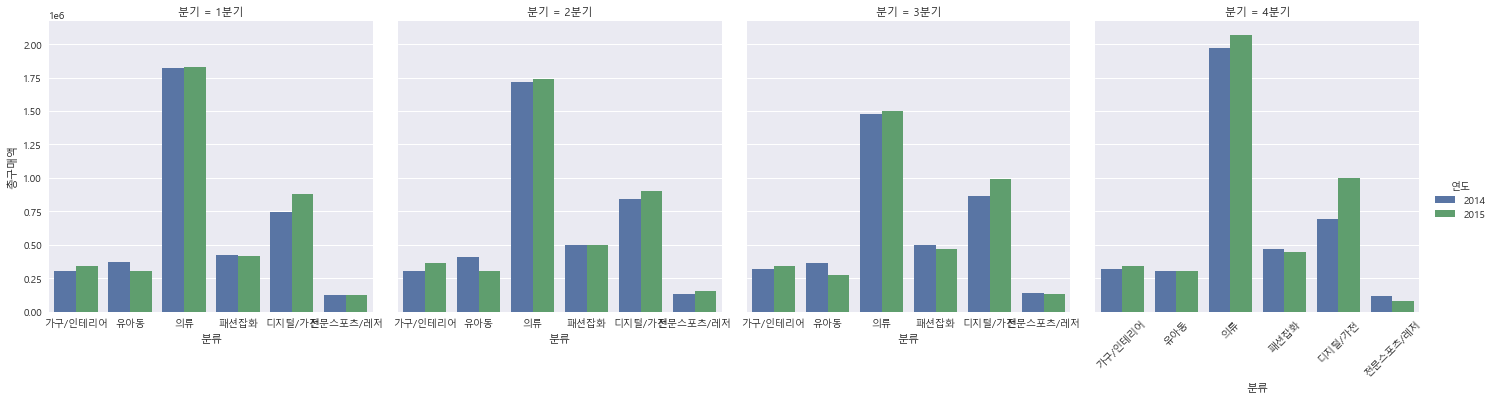

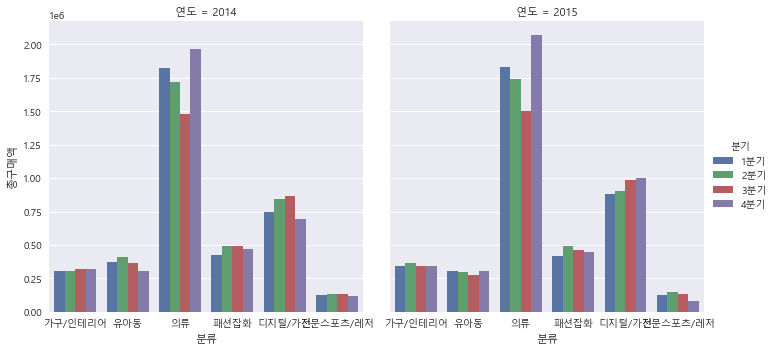

In [31]:
df_all_visualize_3 = df_all.loc[df_all['세분류명'] == '선매품']
df_all_visualize_3.groupby(['연도', '분기', '분류']).sum().reset_index()

sns.catplot(data = df_all_visualize_3, x = '분류', y = '총구매액', hue = '연도', col = '분기', kind = 'bar', ci = False)
plt.xticks(rotation=45)
plt.show()

sns.catplot(data = df_all_visualize_3, x = '분류', y = '총구매액', hue = '분기', col = '연도', kind = 'bar', ci = False)
plt.show()

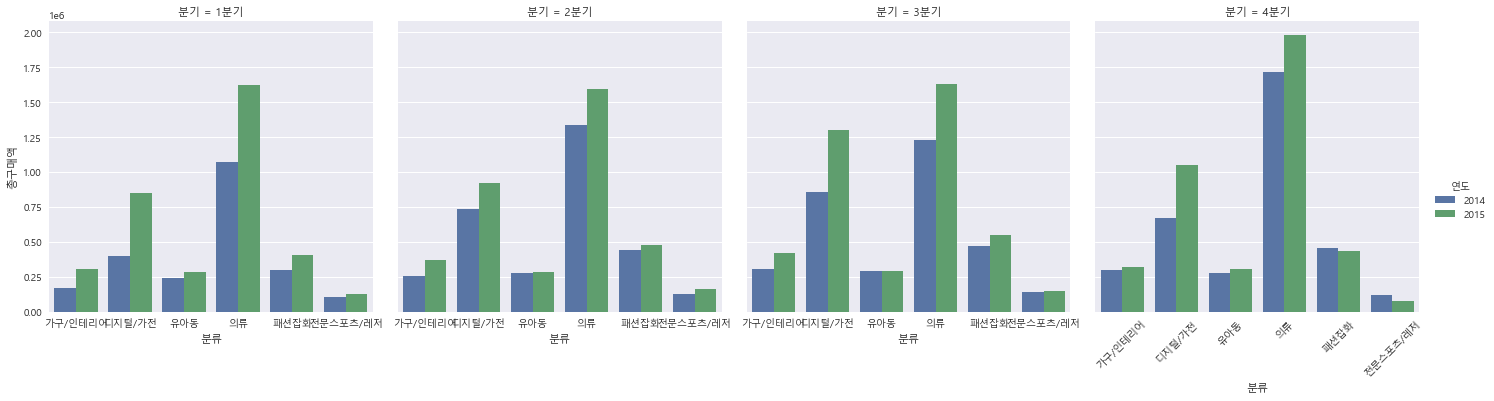

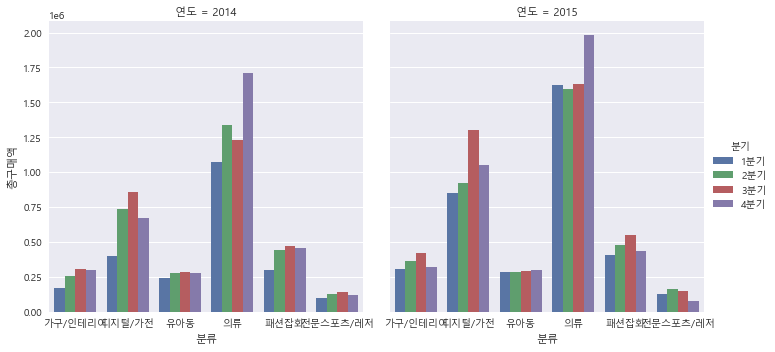

In [32]:
df_up_visualize_3 = df_up.loc[df_up['세분류명'] == '선매품']
df_up_visualize_3.groupby(['연도', '분기', '분류']).sum().reset_index()

sns.catplot(data = df_up_visualize_3, x = '분류', y = '총구매액', hue = '연도', col = '분기', kind = 'bar', ci = False)
plt.xticks(rotation=45)
plt.show()

sns.catplot(data = df_up_visualize_3, x = '분류', y = '총구매액', hue = '분기', col = '연도', kind = 'bar', ci = False)
plt.show()